In [98]:
import rasterio
from rasterio.plot import show
import numpy as np
import matplotlib.pyplot as plt

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler

# Analyse Arrays

In [99]:
aot = rasterio.open('../data/S2A_MSIL2A_20240412T105621_N0510_R094_T30TXP_20240412T165247.SAFE/GRANULE/L2A_T30TXP_A045994_20240412T110532/IMG_DATA/R10m/T30TXP_20240412T105621_AOT_10m.jp2').read()
aot.shape

(1, 10980, 10980)

In [100]:
bo2 = rasterio.open('../data/S2A_MSIL2A_20240412T105621_N0510_R094_T30TXP_20240412T165247.SAFE/GRANULE/L2A_T30TXP_A045994_20240412T110532/IMG_DATA/R10m/T30TXP_20240412T105621_B02_10m.jp2').read()
bo2.shape

(1, 10980, 10980)

In [101]:
tci = rasterio.open('../data/S2A_MSIL2A_20240412T105621_N0510_R094_T30TXP_20240412T165247.SAFE/GRANULE/L2A_T30TXP_A045994_20240412T110532/IMG_DATA/R10m/T30TXP_20240412T105621_TCI_10m.jp2').read()
tci.shape, tci.max()

((3, 10980, 10980), 255)

In [102]:
wvp = rasterio.open('../data/S2A_MSIL2A_20240412T105621_N0510_R094_T30TXP_20240412T165247.SAFE/GRANULE/L2A_T30TXP_A045994_20240412T110532/IMG_DATA/R10m/T30TXP_20240412T105621_WVP_10m.jp2')
wvp.shape

(10980, 10980)

# Construct X_array

In [117]:
link_10_b2 = '../data/S2A_MSIL2A_20240412T105621_N0510_R094_T30TXP_20240412T165247.SAFE/GRANULE/L2A_T30TXP_A045994_20240412T110532/IMG_DATA/R10m/T30TXP_20240412T105621_B02_10m.jp2'
link_10_b8 = '../data/S2A_MSIL2A_20240412T105621_N0510_R094_T30TXP_20240412T165247.SAFE/GRANULE/L2A_T30TXP_A045994_20240412T110532/IMG_DATA/R10m/T30TXP_20240412T105621_B08_10m.jp2'
link_20_b2 = '../data/S2A_MSIL2A_20240412T105621_N0510_R094_T30TXP_20240412T165247.SAFE/GRANULE/L2A_T30TXP_A045994_20240412T110532/IMG_DATA/R20m/T30TXP_20240412T105621_B02_20m.jp2'
link_20_b8a = '../data/S2A_MSIL2A_20240412T105621_N0510_R094_T30TXP_20240412T165247.SAFE/GRANULE/L2A_T30TXP_A045994_20240412T110532/IMG_DATA/R20m/T30TXP_20240412T105621_B8A_20m.jp2'
link_20_b11 = '../data/S2A_MSIL2A_20240412T105621_N0510_R094_T30TXP_20240412T165247.SAFE/GRANULE/L2A_T30TXP_A045994_20240412T110532/IMG_DATA/R20m/T30TXP_20240412T105621_B11_20m.jp2'
link_20_b4 = '../data/S2A_MSIL2A_20240412T105621_N0510_R094_T30TXP_20240412T165247.SAFE/GRANULE/L2A_T30TXP_A045994_20240412T110532/IMG_DATA/R20m/T30TXP_20240412T105621_B04_20m.jp2'

b2 = rasterio.open(link_20_b2).read()
b8a = rasterio.open(link_20_b8a).read()
b11 = rasterio.open(link_20_b11).read()
b4 = rasterio.open(link_20_b4).read()

b2.shape , b8a.shape, b11.shape, b4.shape

((1, 5490, 5490), (1, 5490, 5490), (1, 5490, 5490), (1, 5490, 5490))

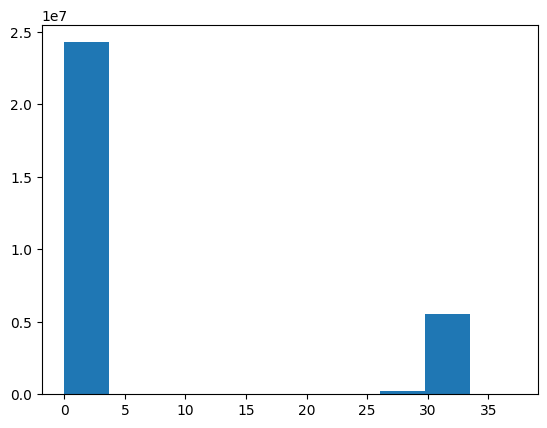

In [118]:
# NDVI: (B08 - B04)/(B08 + B04) = Normalized Difference Vegetation Index 
# NDWI: (B03 - B08)/(B03 + B08) = Normalized Difference Water Index
# NDBI: (B11 - B08)/(B11 + B08) = The Normalized Difference Built-up Index

ndvi = (b8a - b4) / (b8a + b4)

plt.hist(ndvi.reshape(ndvi.shape[1]*ndvi.shape[2]));

In [119]:
X = np.concatenate([b2, b8a, b11, ndvi], axis=0)
X.shape

(4, 5490, 5490)

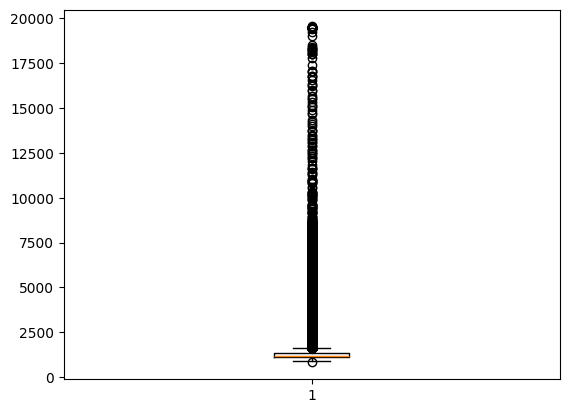

In [120]:
plt.boxplot(b2.reshape(b2.shape[1]*b2.shape[2]));

In [121]:
sc = RobustScaler()
X_scaled = sc.fit_transform(X[0])
X_scaled = np.expand_dims(X_scaled, axis=0)

for i in range(1, X.shape[0]):
    X_scaled = np.concatenate([X_scaled, np.expand_dims(sc.fit_transform(X[i]), axis=0)], axis=0)
    
X_scaled

array([[[-2.69230769e-01, -2.64150943e-01, -3.96226415e-01, ...,
         -3.18021201e-01, -2.27586207e-01, -1.37103685e-02],
        [-5.57692308e-01, -2.64150943e-01, -2.64150943e-01, ...,
         -2.82685512e-01, -4.20689655e-01, -3.46186804e-01],
        [-3.26923077e-01, -1.50943396e-01, -9.43396226e-02, ...,
         -3.88692580e-01, -3.31034483e-01, -3.53041988e-01],
        ...,
        [ 3.26923077e-01,  4.90566038e-01,  9.81132075e-01, ...,
         -2.26148410e-01, -2.27586207e-01, -4.25021422e-01],
        [ 1.15384615e+00,  7.54716981e-01,  1.18867925e+00, ...,
         -1.27208481e-01, -4.13793103e-01, -2.09083119e-01],
        [ 2.59615385e+00,  2.26415094e+00,  1.83018868e+00, ...,
         -1.94346290e-01, -1.72413793e-01, -8.91173950e-02]],

       [[-4.16666667e-01, -4.80000000e-01, -4.16666667e-01, ...,
         -5.84918478e-01, -7.24811515e-01, -7.22240859e-01],
        [-4.58333333e-01, -8.80000000e-01, -5.83333333e-01, ...,
         -6.10733696e-01, -6.23372173e